# Draw graphs
<hr>

This chapter will demonstrate how to use Python's `matplotlib` library to generate various types of graphs, and briefly introduce another plotting libarary, `seaborn`, for creating more aesthetically pleasing and sophisticated visualizations.

## ``plot``
<hr>

When using the matplotlib lirary for plotting, we typically import the `pyplot` interface from it and name it as `plt`. Then, we use the `plot` function to create graphs.

In [1]:
import matplotlib.pyplot as plt

For example, the following codes draw the graph of $y=sin(x)$.

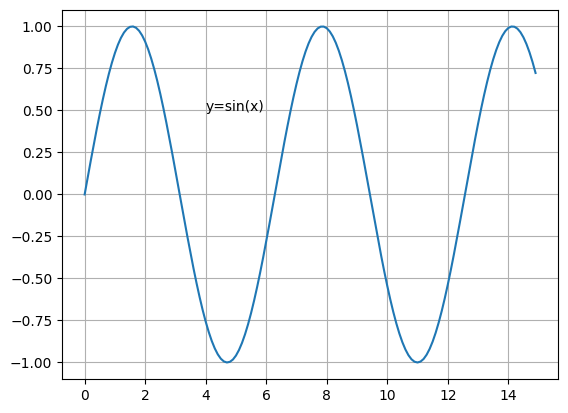

In [2]:
# import the libraries
import matplotlib.pyplot as plt
import numpy as np

# plt.style.use('default')

# the data for plotting
x = np.arange(0, 15, 0.1)  # x-axis coordinate data
y = np.sin(x)  # y-axis conordinate data

# put the coordinated in the function plot
plt.plot(x, y)
plt.text(4, 0.5, "y=sin(x)")  # show texts in specified coordinates

# show the grid
plt.grid()

# show the graph
plt.show()

The syntax for ``plot`` function is below：

<table>   
    <tr style="border-top:solid; border-bottom:solid">
            <th colspan=2 style="text-align:center">plot([x], y, [fmt], **kwargs)</th>
    </tr>
    <tr>
        <td style="text-align:left">[x]</td>
        <td style="text-align:left">Optional parameter, x-axis data</td>
    </tr>
    <tr>
        <td style="text-align:left">y</td>
        <td style="text-align:left">y-axis data</td>
    </tr>
    <tr>
        <td style="text-align:left">[fmt]</td>
        <td style="text-align:left">Optional parameter, defines basic style: color, marker, line style</td>
    </tr>
    <tr style="border-bottom:solid">
        <td style="text-align:left">**kwargs</td>
        <td style="text-align:left">Optional parameters, defines line width, labels, etc.</td>
    </tr>
</table>
<br />

```{note}
In this chapter, we use squre brackets `[ ]` to signify the optional parameters.
```

[fmt] are the codes for color, marker and line style.

| Color Code | Effect    | Line Style Code | Effect      | Marker Code | Effect          |
|------------|-----------|-----------------|-------------|-------------|-----------------|
| b          | Blue      | -               | Solid line  | o           | Filled circle   |
| r          | Red       | --              | Dashed line | .           | Dot             |
| g          | Green     | -.              | Dash-dot    | +           | Plus sign       |
| k          | Black     | :               | Dotted line | *           | Asterisk        |
| w          | White     |                 |             | x           | Cross           |
| y          | Yellow    |                 |             | ^           | Triangle up     |
| c          | Cyan      |                 |             | v           | Triangle down   |
| m          | Magenta   |                 |             | s           | Square          |

```{admonition} tip
:class: tip
The plot function fundamentally connects discrete coordinate points with lines to create graphical representations. Consequently, when only two x-coordinates and two y-coordinates are provided, it will generate a straight line segment between these two points.
```

The following `plot` examples shows the usages of  `[x]`,`[fmt]`,`**Kwargs`.

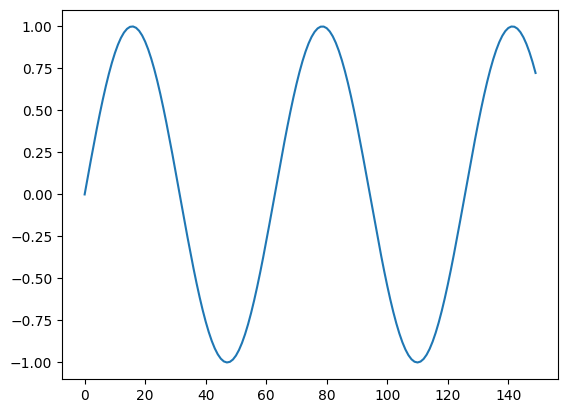

In [3]:
# The x-axis data defaults to an arithmetic array ranging from 0 to N-1 with a step size of 1, 
# where N is the data volume of the y-axis ordinate "y"
plt.plot(y)  

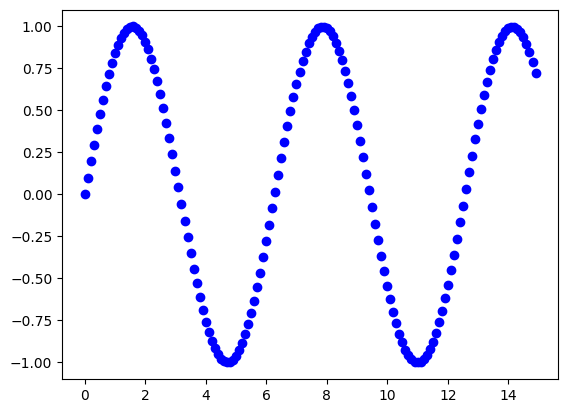

In [4]:
plt.plot(x, y, "bo ")  # line color is blue, marker is filled circle

- Use `lw` or 'linewidth' to set the line width.

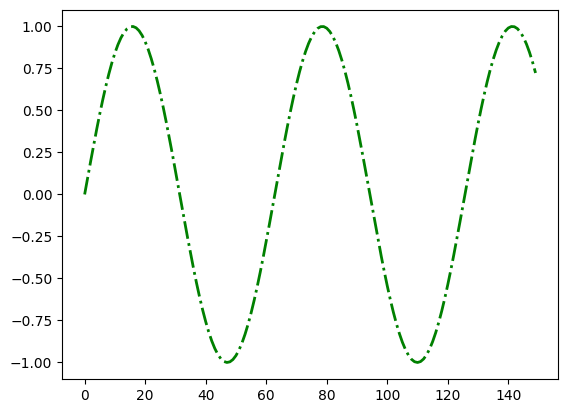

In [5]:
plt.plot(y, "g-.", lw=2)  # color is green, line style is dash-dot and line width is 2

If we want to customize the axis labels, axis ticks, tick ranges, plot title, or add a legend, we can achieve this by setting properties in pyplot functions such as:  
- `xlabel` → x-axis label 
- `ylabel` → y-axis label  
- `xticks` → x-axis ticks  
- `yticks` → y-axis ticks
- `xlim` → x-axis limits  
- `ylim` → y-axis lmits 
- `title` → plot title/capital  
- `grid` → display grid
- `legend` → display legend

To adjust image clarity, we can modify the DPI (dots per inch) using `plt.rcParams["figure.dpi"]`. To change the image size, we can set the width and height via `plt.rcParams["figure.figsize"]`.  


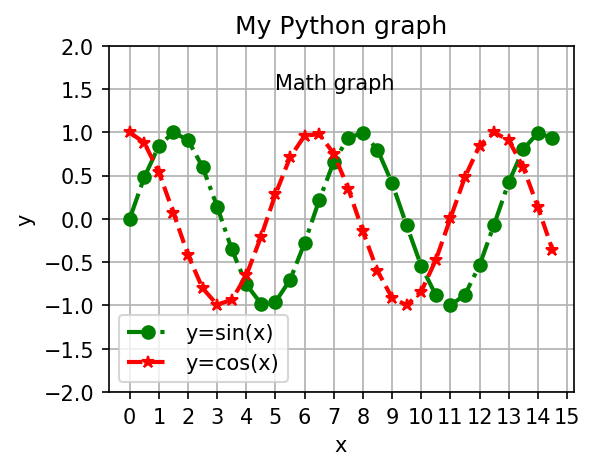

In [6]:
import matplotlib.pyplot as plt
import numpy as np


# generate data
x = np.arange(0, 15, 0.5)
y1 = np.sin(x)
y2 = np.cos(x)

# figure size or dpi settings
plt.figure(figsize=(4, 3), dpi=150)  
# or plt.rcParams('figsize') = [4, 3] # the values are width, heigh in inches
# or plt.rcParams["figure.dpi"] = 100 # dpi is dots-per-inch, default is 100.0

# generate multi lines using "plot"
plt.plot(x, y1, "go-.", label="y=sin(x)", linewidth=2) 
plt.plot(x, y2, "r*--", label="y=cos(x)", linewidth=2) 

plt.ylabel("y")  # y-axis label
plt.xlabel("x")  # x-axis label
plt.xticks(np.arange(0, 16))  # Set the x-axis ticks to an array ranging from 0 (inclusive) to 16 (exclusive)
plt.ylim([-2, 2])  # set the y-axis range from -2 to 2.
plt.legend()  # show the legend
plt.grid()  # show the grid
plt.text(5, 1.5, "Math graph")  # show some texts in specified coordinates
plt.title("My Python graph")  # the capital of the picture

# save the picture in the computer
plt.savefig("my figure.png")

# show the picture
plt.show()

- To save the figure in the computer, use the function 'savefig( )' with the address texts inside the parenthesis.

## Scatter plot, bar chart, histogram
<hr>

### ``scatter``
<hr>

A scatter plot (aka scatter chart, scatter graph) uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables.

We can use the function``scatter`` to draw scatters. They syntax for it is as belows.

<table>
    <tr style="border-top:solid; border-bottom:solid">
        <th colspan=2 style="text-align:center">scatter(x, y, s=None, c=None, **kwargs)</th>
    </tr>
    <tr>
        <td style="text-align:left">x</td>
        <td style="text-align:left">x-coordinate data</td>
    </tr>
    <tr>
        <td style="text-align:left">y</td>
        <td style="text-align:left">y-coordinate data</td>
    </tr>
    <tr>
        <td style="text-align:left">[s]</td>
        <td style="text-align:left">Optional: a number or array specifying marker size</td>
    </tr>
    <tr>
        <td style="text-align:left">[c]</td>
        <td style="text-align:left">Optional: a number or array specifying marker color</td>
    </tr>
    <tr style="border-bottom:solid">
        <td style="text-align:left">**kwargs</td>
        <td style="text-align:left">Optional: additional properties (e.g., alpha for transparency)</td>
    </tr>
</table>
<br />

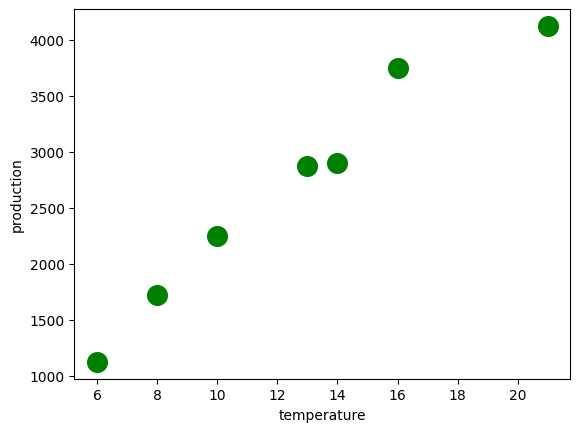

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# data
production = [1125, 1725, 2250, 2875, 2900, 3750, 4125]
temperature = [6, 8, 10, 13, 14, 16, 21]

plt.scatter(temperature, production, s=200, c="g")
plt.xlabel("temperature")  # x-axis label
plt.ylabel("production")  # y-axis label
plt.show()

### ``bar``, `barh`
<hr>

A bar chart, also known as a bar graph, is a visual way to represent data using rectangular bars, where the length or height of the bars is proportional to the value they represent.

The bar chart can be created using the `bar` function in pyplot. The basic syntax of this function is:

<table>
    <tr style="border-top:solid; border-bottom:solid">
        <th colspan=2 style="text-align:center">bar(x, height, width=None, **kwargs)</th>
    </tr>
    <tr>
        <td style="text-align:left">x</td>
        <td style="text-align:left">X-coordinate data (bar positions)</td>
    </tr>
    <tr>
        <td style="text-align:left">height</td>
        <td style="text-align:left">Bar height(s) (numeric value or array)</td>
    </tr>
    <tr>
        <td style="text-align:left">width</td>
        <td style="text-align:left">Optional: bar width(s) (numeric value or array, default=None)</td>
    </tr>
    <tr style="border-bottom:solid">
        <td style="text-align:left">**kwargs</td>
        <td style="text-align:left">Optional: additional properties (e.g., color, transparency, etc.)</td>
    </tr>
</table>
<br />

Suppose the results of a survey on drinking water preferences among Grade 1 and Grade 2 college students are as follows:  

| Choice      | Grade 1 | Grade 2 |  
|:-----------:|------|--------|  
| Carbonated Drinks | 6    | 9      |  
| Green Tea         | 7    | 4      |  
| Mineral Water     | 6    | 4      |  
| Juice             | 1    | 5      |  
| Others            | 2    | 6      |  
| **Total**         | 22   | 28     |  


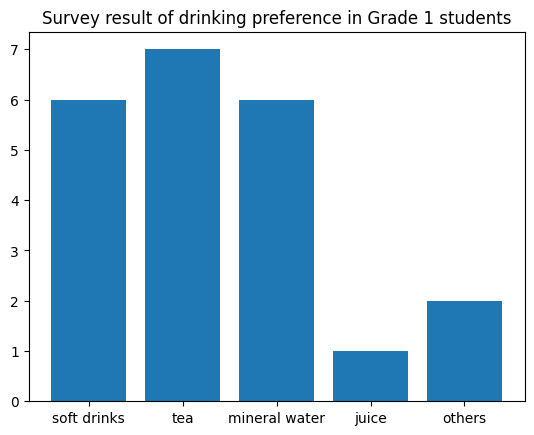

In [8]:
import matplotlib.pyplot as plt

waters = ("soft drinks", "tea", "mineral water", "juice", "others")
buy_number = [6, 7, 6, 1, 2]

plt.bar(waters, buy_number)
plt.title("Survey result of drinking preference in Grade 1 students")
plt.show()

Horizontal bar charts are created using the `barh()` function, which has essentially the same usage as the standard `bar()` function.

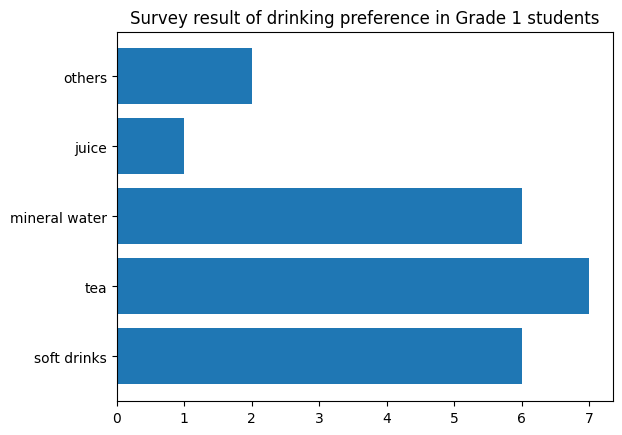

In [9]:
import matplotlib.pyplot as plt

waters = ("soft drinks", "tea", "mineral water", "juice", "others")
buy_number = [6, 7, 6, 1, 2]

plt.barh(waters, buy_number)
plt.title("Survey result of drinking preference in Grade 1 students")
plt.show()

To display survey results for two categories side-by-side using bar charts, you can:

- Call `bar()` or `barh()` twice with adjusted positional parameters

- **Manually control bar positions and tick labels** for proper alignment

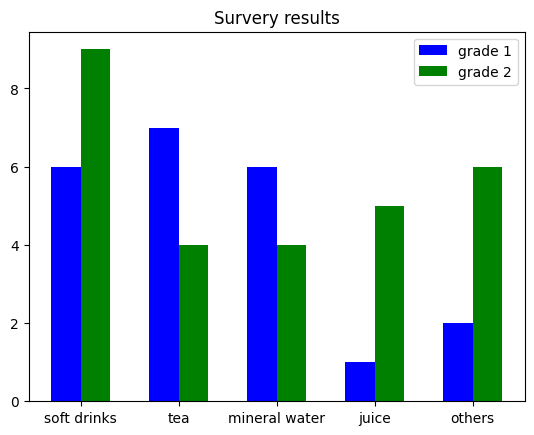

In [10]:
import matplotlib.pyplot as plt
import numpy as np

waters = ("soft drinks", "tea", "mineral water", "juice", "others")
y1 = [6, 7, 6, 1, 2]
y2 = [9, 4, 4, 5, 6]

bar_width = 0.3
x1 = np.arange(len(waters))  # x-coordinates for grade 1
x2 = x1 + bar_width  # x-coordinates for grade 2

plt.bar(x1, height=y1, width=bar_width, color="b", label="grade 1")
plt.bar(x2, height=y2, width=bar_width, color="g", label="grade 2")

plt.legend()
plt.xticks(
    x1 + bar_width / 2, waters
)  # index_male + bar_width/2 are the x-tick locations, and the list "waters" are the x-tick contents
plt.title("Survery results")
plt.show()

### ``hist``
<hr>

A histogram is a chart that plots the distribution of a numeric variable's values as a series of bars. Each bar typically covers a range of numeric values called a bin or class; **a bar's height indicates the frequency of data points** with a value within the corresponding bin.

- A histogram is a visual representation of the distribution of quantitative data.

Although a histogram may look like a bar chart, but they are different. We use the function ``hist``to draw a histogram. The syntax of the function is:

<table>   
    <tr style="border-top:solid; border-bottom:solid">
            <th colspan=2 style="text-align:center">hist(x, bins=None, **kwargs)</th>
    </tr>
    <tr>
        <td style="text-align:left">x</td>
        <td style="text-align:left">Input data</td>
    </tr>
    <tr>
        <td style="text-align:left">bins</td>
        <td style="text-align:left">Optional parameter, number of bins. If not specified, a value will be automatically calculated.</td>
    </tr>
    <tr style="border-bottom:solid">
        <td style="text-align:left">**kwargs</td>
        <td style="text-align:left">Optional parameters to define other attributes, such as color, transparency, etc.</td>
    </tr>
</table>
<br />

For example:

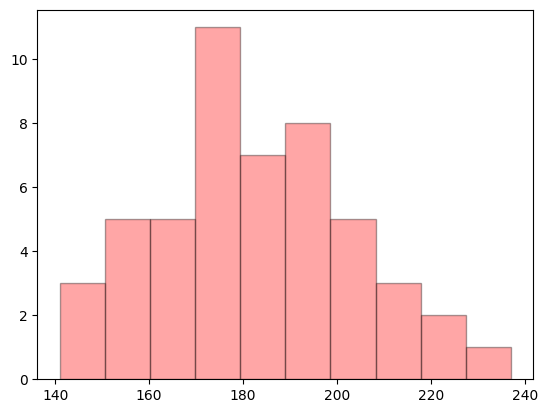

In [11]:
import matplotlib.pyplot as plt

x = [141, 159, 166, 172, 177, 182, 188, 196, 203, 214, 143, 160, 167, 173, 177, 183, 189, 196, 203, 215, 144, 160, 168,
     173,
     178, 184, 189, 196, 205, 218, 152, 162, 170, 174, 179, 186, 190, 197, 208, 226, 158, 165, 172, 176, 182, 188, 195,
     202, 213, 237,
     ]

plt.hist(x, color="r", edgecolor="k",
         alpha=0.35)  # set the fill color red, edge color black and transparancy rate 0.35
plt.show()

## Draw multi plots `subplot`
<hr>

To generate multiple plots at once, the `subplot` function is typically used. Its basic syntax is as follows:

<table>   
    <tr style="border-top:solid; border-bottom:solid">
            <th colspan=2 style="text-align:center">ax = plt.subplot(nrows=1, ncols=1, index=1, **kwargs)</th>
    </tr>
    <tr>
        <td style="text-align:left">nrows</td>
        <td style="text-align:left">Number of rows of subplots</td>
    </tr>
    <tr>
        <td style="text-align:left">ncols</td>
        <td style="text-align:left">Number of columns of subplots</td>
    </tr>
     <tr>
        <td style="text-align:left">index</td>
        <td style="text-align:left">Position index of the subplot, counted from top-left to bottom-right (starting at 1)</td>
    </tr>
    <tr>
        <td style="text-align:left">**kwargs</td>
        <td style="text-align:left">Additional parameters, such as for specifying axis ranges</td>
    </tr>
    <tr style="border-bottom:solid">
        <td style="text-align:left">ax</td>
        <td style="text-align:left">Variable name for the subplot object, used for parameter adjustment</td>
    </tr>
</table>
<br />

The layout is organized in rows and columns, which are represented by the arguments `nrows` and `ncols`. The third argument `index` represents the index (**indexing from top left to bottom right**) of the current plot.

The following example demonstrates how to create 3 subplots, with one of them spanning across 2 columns.

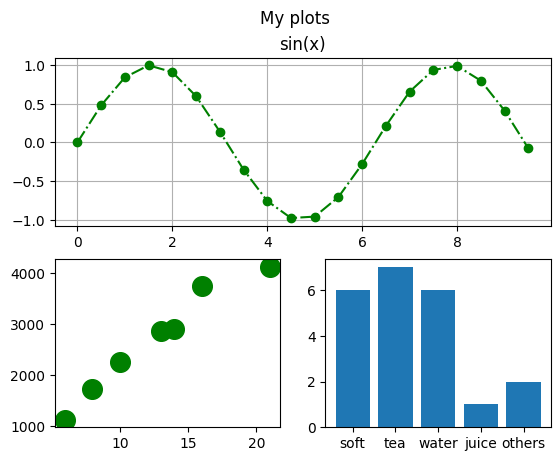

In [12]:
import matplotlib.pyplot as plt
import numpy as np


# the first plot
x = np.arange(0, 10, 0.5)
y = np.sin(x)
ax1 = plt.subplot(2, 1, 1)  # divide the canvas into 2 rows and 1 column and this subplot is in the position index 1
ax1.plot(x, y, "go-.")
ax1.grid()
ax1.set_title("sin(x)")  # set the title of the subplot

# the second plot
production = [1125, 1725, 2250, 2875, 2900, 3750, 4125]
temp = [6, 8, 10, 13, 14, 16, 21]
ax2 = plt.subplot(2, 2, 3)  # divide the canvas into 2 rows and 1 column and this subplot is in the position index 3
ax2.scatter(temp, production, s=200, c="g")  

# the third plot
waters = ("soft", "tea", "water", "juice", "others")
buy_number = [6, 7, 6, 1, 2]
ax3 = plt.subplot(2, 2, 4)
ax3.bar(waters, buy_number)

plt.suptitle("My plots")  # set the title of the whole figure
plt.show()

There is also a `subplots` function, which is used as `fig, axs = plt.subplots(nrows=1, ncols=1, index=1, **kwargs)`. Here, `fig` is used to adjust parameters for the entire figure, while `axs` is used to modify parameters for individual subplots. Due to space limitations, we won't elaborate further on this.

## Pie chart, box chart* [^1]
<hr>

[^1]: \* means this section may not be delivered in class.

### ``pie``
<hr>

A pie chart, also known as a circle chart, is a type of graph that uses slices of a circle to represent data. Each slice represents a portion or percentage of a whole. The size of each slice corresponds to its value or proportion of the total.

We can draw the pie char using the function ``pie``, of which the syntax is below：

<table>   
    <tr style="border-top:solid; border-bottom:solid">
            <th colspan=2 style="text-align:center">pie(x, explode=None, labels=None, autopct=None, **kwargs)</th>
    </tr>
    <tr>
        <td style="text-align:left">x</td>
        <td style="text-align:left">Array, the proportional size of each wedge</td>
    </tr>
    <tr>
        <td style="text-align:left">explode</td>
        <td style="text-align:left">Optional, array, the offset radius for each wedge</td>
    </tr>
    <tr>
        <td style="text-align:left">labels</td>
        <td style="text-align:left">Optional, string array, labels for each wedge</td>
    </tr>
    <tr>
        <td style="text-align:left">autopct</td>
        <td style="text-align:left">Optional, string or function, format string or function for wedge values</td>
    </tr>
    <tr style="border-bottom:solid">
        <td style="text-align:left">**kwargs</td>
        <td style="text-align:left">Optional, additional properties like shadow, startangle, etc.</td>
    </tr>
</table>
<br />

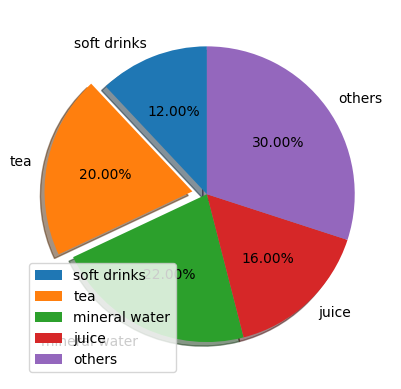

In [13]:
import matplotlib.pyplot as plt


labels = ("soft drinks", "tea", "mineral water", "juice", "others")
x = [6, 10, 11, 8, 15]
explode = [0, 0.1, 0, 0, 0]  

plt.pie(x, explode=explode, labels=labels, autopct="%.2f%%", shadow=True, startangle=90)
plt.legend()  
plt.show()

### ``boxplot``
<hr>

Box plot is a graphical representation of the distribution of a dataset. It displays key summary statistics such as the median, quartiles, and potential outliers in a concise and visual manner. 

We use the functionn ``boxplot``to draw the box plot, of which the syntax is:

<table>   
    <tr style="border-top:solid; border-bottom:solid">
            <th colspan=2 style="text-align:center">boxplot(x, notch=false, vert=false, **kwargs)</th>
    </tr>
    <tr>
        <td style="text-align:left">x</td>
        <td style="text-align:left">Input data</td>
    </tr>
    <tr>
        <td style="text-align:left">notch</td>
        <td style="text-align:left">Optional, whether to draw a notched boxplot</td>
    </tr>
    <tr>
        <td style="text-align:left">vert</td>
        <td style="text-align:left">Whether to draw vertical boxes (False for horizontal)</td>
    </tr>
    <tr style="border-bottom:solid">
        <td style="text-align:left">**kwargs</td>
        <td style="text-align:left">Optional parameters for additional properties</td>
    </tr>
</table>
<br />

Assume a transcript as below：

| Module      | Student A | Student B | Student C | Student D | Student E | Student F | Student G | Student H | Student I | Student J | Student K |
|:------------:|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|
| Python       | 76       | 90       | 97       | 71       | 70       | 93       | 86       | 83       | 78       | 85       | 81       |
| Economics    | 93       | 81       | 76       | 88       | 66       | 79       | 83       | 92       | 78       | 86       | 78       |
| Marketing    | 74       | 87       | 85       | 69       | 90       | 80       | 77       | 84       | 91       | 74       | 70       |
| Finance      | 68       | 75       | 70       | 84       | 73       | 60       | 76       | 81       | 88       | 68       | 75       |
| Statistics   | 55       | 91       | 68       | 73       | 84       | 81       | 70       | 69       | 94       | 62       | 71       |

Draw the box plot:

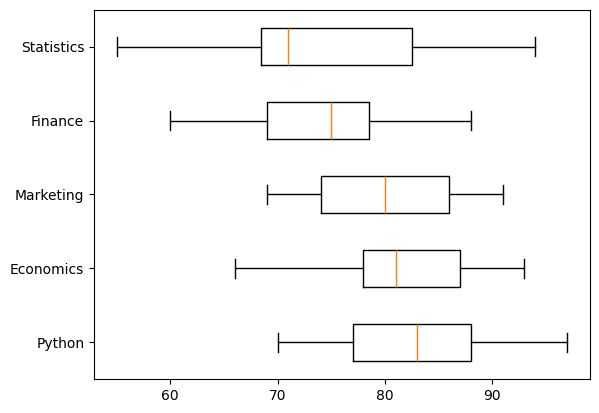

In [14]:
import matplotlib.pyplot as plt
import numpy as np


scores = [
    [76, 90, 97, 71, 70, 93, 86, 83, 78, 85, 81],
    [93, 81, 76, 88, 66, 79, 83, 92, 78, 86, 78],
    [74, 87, 85, 69, 90, 80, 77, 84, 91, 74, 70],
    [68, 75, 70, 84, 73, 60, 76, 81, 88, 68, 75],
    [55, 91, 68, 73, 84, 81, 70, 69, 94, 62, 71],
]
courses = ("Python", "Economics", "Marketing", "Finance", "Statistics")

plt.boxplot(scores, vert=False)
plt.yticks(np.arange(1, 6), courses)  # set the y ticks
plt.show()

## Introduction to `Seaborn` *
<hr>

`Seaborn` is another commonly used Python library that builds upon `matplotlib`. It produces more aesthetically pleasing visualizations and integrates particularly well with `Pandas` data structures.

- Install the library `Seanborn` by `pip install`

```python
pip install seaborn
```

In [15]:
# Import seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Apply the default theme
sns.set_theme()

x = np.arange(0, 15, 0.5)
y = np.sin(x)
plt.plot(x, y)
plt.show()

ModuleNotFoundError: No module named 'seaborn'

As we can see, after applying `Seaborn`'s theme, the color scheme of the plot has changed. `Seaborn` comes with many built-in datasets, and next we'll import the tips dataset.

In [149]:
# Load an example dataset "tips"
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### ``relplot``
<hr>

In [74]:
type(tips)

pandas.core.frame.DataFrame

It can be observed that after loading the `tips` dataset, it is stored as a Pandas `DataFrame`. Seaborn offers streamlined plotting capabilities for DataFrame structures. As an example, we'll use the `relplot()` function (relational plots) to illustrate Seaborn's visualization approach. The basic usage of `relplot()` is:

<table>   
    <tr style="border-top:solid; border-bottom:solid">
            <th colspan=2 style="text-align:center">relplot(data=None, x=None, y=None, row=None, col=None，hue=None, kind='scatter', **kwargs)</th>
    </tr>
    <tr>
        <td style="text-align:left">data</td>
        <td style="text-align:left">Input dataset, typically in Pandas DataFrame or Numpy array format</td>
    </tr>
    <tr>
        <td style="text-align:left">x</td>
        <td style="text-align:left">Variable for x-axis</td>
    </tr>
     <tr>
        <td style="text-align:left">y</td>
        <td style="text-align:left">Variable for y-axis</td>
    </tr>
     <tr>
        <td style="text-align:left">row/col</td>
        <td style="text-align:left">Variables to create subplots by row or column</td>
    </tr>
    <tr>
        <td style="text-align:left">hue</td>
        <td style="text-align:left">Grouping variable that will produce elements with different colors</td>
    </tr>
     <tr>
        <td style="text-align:left">kind</td>
        <td style="text-align:left">Plot type: 'line' or 'scatter'</td>
    </tr>
    <tr style="border-bottom:solid">
        <td style="text-align:left">**kwargs</td>
        <td style="text-align:left">Additional parameters (e.g., style, sizes, etc.)</td>
    </tr>
</table>
<br />


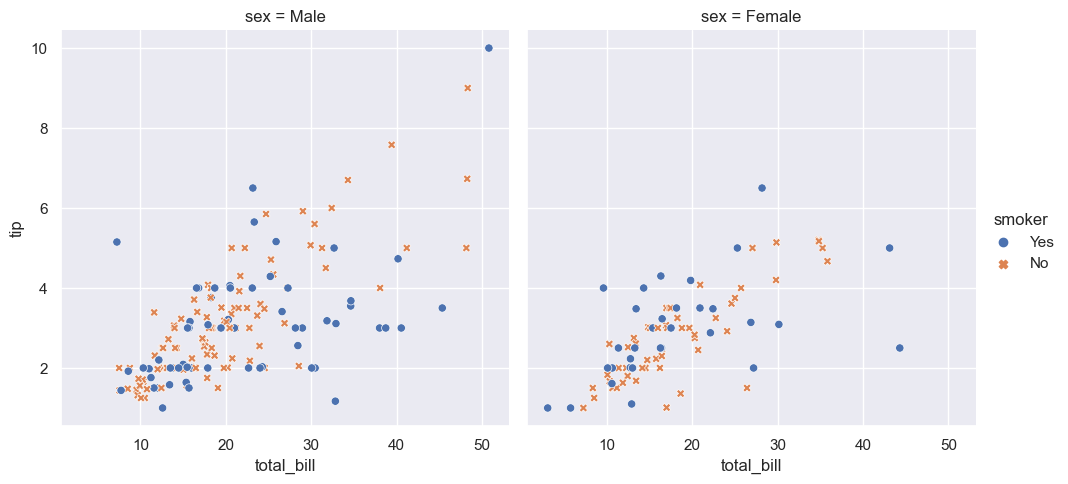

In [24]:
sns.relplot(
    data=tips,
    x="total_bill",
    y="tip",
    col="sex",  # generate subplots by the category "sex"
    hue="smoker",  # produce different colors by the category "smoker"
    style="smoker",  # produce elements with different styles by the category "smoker"
)
plt.show()

When generating line plots, data points sharing the same x-coordinate values will be aggregated. The visualization will display the mean value along with a 95% confidence interval.

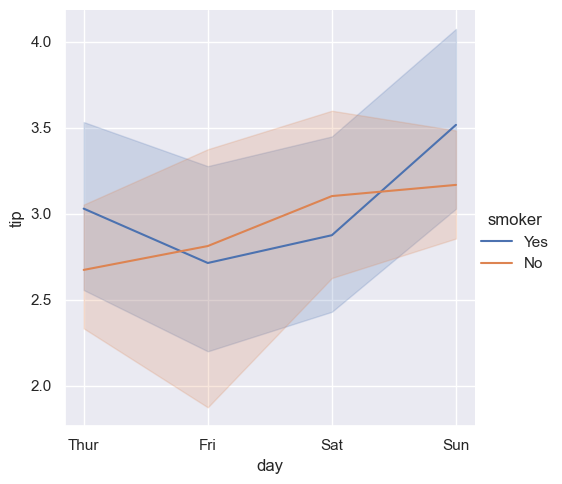

In [25]:
sns.relplot(data=tips, x="day", y="tip", hue="smoker", kind="line")  
plt.show()

Seaborn also provides the `regplot` function, which can perform linear regression along with a 95% confidence interval fitting on the data.

<Axes: xlabel='total_bill', ylabel='tip'>

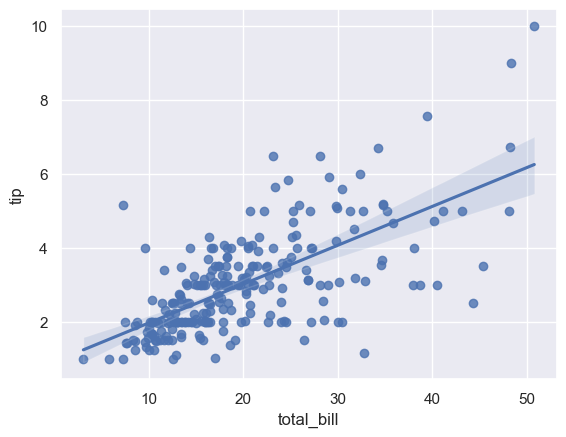

In [83]:
sns.regplot(data=tips, x="total_bill", y="tip")

For curve fitting, you can further configure parameters such as `order`, `logx`, and `logistic` in regplot to generate the desired plot.

### ``barplot``
<hr>
Seaborn provides built-in functions for generating common statistical visualizations, including:

- `barplot()` for bar charts

- `histplot()` for histograms

- `boxplot()` for box plots

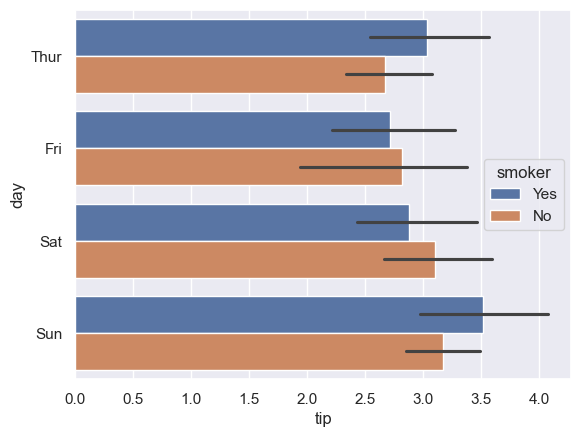

In [93]:
sns.barplot(
    data=tips, y="day", x="tip", hue="smoker", orient="h"  # "orient" is to plot the bar whether "vertically" or "horizontally"
)
plt.show()

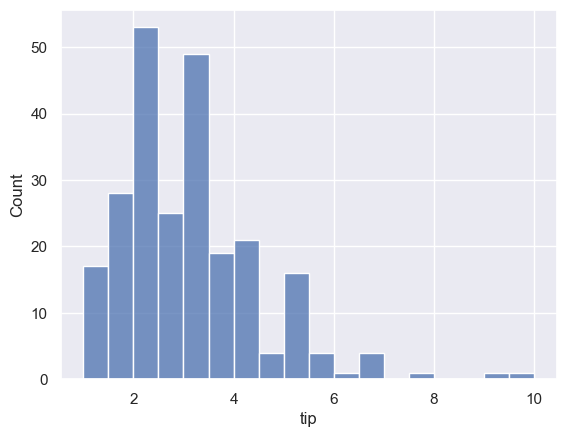

In [28]:
sns.histplot(
    data=tips,
    x="tip",
)
plt.show()

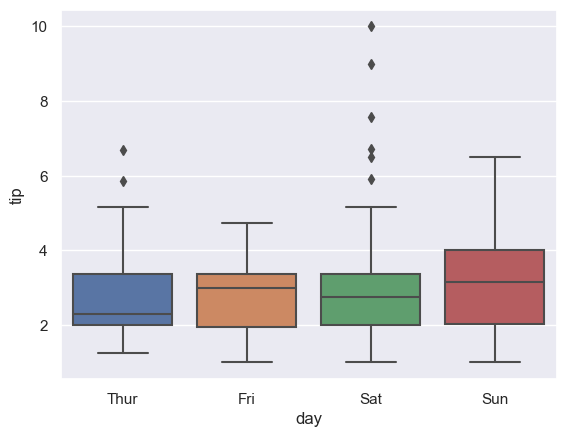

In [29]:
sns.boxplot(
    data=tips,
    x="day",
    y="tip",
)
plt.show()

Seaborn offers additional plotting functions such as `scatterplot` for scatter plots, `histplot` for histograms, `heatmap()` for heatmaps and `violinplot()` for violin plots. Due to space limitations, we won't cover them in detail here. Interested readers may refer to the official documentation for further exploration.

## Exercises
<hr>

```{exercise-start}
:label: xlabel
```
What is the purpose of the `xlabel()` function in Matplotlib?

A.&nbsp;&nbsp;  Set the x-axis label

B.&nbsp;&nbsp;  Set the y-axis label

C.&nbsp;&nbsp;  Set the title

D.&nbsp;&nbsp;  Set the legend

```{exercise-end}
```

````{solution} xlabel
:class: dropdown
A
````

```{exercise-start}
:label: savefigure
```
Which Matplotlib method is used to save a figure to a file?

A.&nbsp;&nbsp;  savefig()

B.&nbsp;&nbsp;  savefigure()

C.&nbsp;&nbsp;  save()

D.&nbsp;&nbsp;  output()

```{exercise-end}
```

````{solution} savefigure
:class: dropdown
A
````

```{exercise-start}
:label: text
```
Which method below is to add text annotations to a Matplotlib plot?

A.&nbsp;&nbsp;  annotate()

B.&nbsp;&nbsp;  text()

C.&nbsp;&nbsp;  message()

D.&nbsp;&nbsp;  add_annotation()

```{exercise-end}
```

````{solution} text
:class: dropdown
B
````

```{exercise-start}
:label: figsize
```
Which Matplotlib method is used to set the figure size?

A.&nbsp;&nbsp;  set_size()

B.&nbsp;&nbsp;  figure_size()

C.&nbsp;&nbsp;  set_figsize()

D.&nbsp;&nbsp;  figure(figsize=())

```{exercise-end}
```

````{solution} figsize
:class: dropdown
D
````

```{exercise-start}
:label: subplot
```
What is the purpose of the subplot() function in Matplotlib?

A.&nbsp;&nbsp;  Adjust subplot spacing

B.&nbsp;&nbsp;  Add subplots to a figure

C.&nbsp;&nbsp;  Create multiple plots in one figure

D.&nbsp;&nbsp;  Set the subplot title

```{exercise-end}
```

````{solution} subplot
:class: dropdown
C
````

```{exercise-start}
:label: alpha
```
How to set the transparency of elements in a Matplotlib plot?

A.&nbsp;&nbsp;  transparency parameter in plot()

B.&nbsp;&nbsp;  alpha parameter in plot()

C.&nbsp;&nbsp;  set_transparency() method

D.&nbsp;&nbsp;  set_alpha() method

```{exercise-end}
```

````{solution} alpha
:class: dropdown
B
````

```{exercise-start}
:label: line-plot
```
How to plot a simple line graph using Matplotlib in Python?

A.&nbsp;&nbsp;  plot(x_values, y_values)

B.&nbsp;&nbsp;  draw_line(x_values, y_values)

C.&nbsp;&nbsp;  line_plot(x_values, y_values)

D.&nbsp;&nbsp;  line(x_values, y_values)

```{exercise-end}
```

````{solution} line-plot
:class: dropdown
A
````

```{exercise-start}
:label: histogram
```

Which function below is most suitable to show the distribution of data?

A.&nbsp;&nbsp;  bar()

B.&nbsp;&nbsp;  plot()

C.&nbsp;&nbsp;  hist()

D.&nbsp;&nbsp;  scatter()

```{exercise-end}
```

````{solution} histogram
:class: dropdown
C
````

```{exercise-start}
:label: draw-heart
```
Plot the graphs of the following 2 functions and fill the area between them. (tips: use `fill_between` to fill the color between some plots）

$$
\begin{align}
f(x)=&\sqrt{2|x| - x^2}\\
g(x)=&-2.14\sqrt{\sqrt{2}-\sqrt{|x|}}
\end{align}
$$

```{exercise-end}
```

````{solution} draw-heart
:class: dropdown

```{code-block} python
import matplotlib.pyplot as plt
import numpy as np
import math

x = np.linspace(-2, 2, 1000)
y1 = [math.sqrt(2 * abs(i) - i**2) for i in x]
y2 = [-2.14 * math.sqrt(math.sqrt(2) - math.sqrt(abs(i))) for i in x]

plt.plot(x, y1, "r")
plt.plot(x, y2, "r")
plt.fill_between(x, y1, y2, color="r")

plt.show()
```
````

```{exercise-start}
:label: draw-heart2
```

Plot the graph of the following function, and try to vary the value of α from 0 to 20 to achieve a dynamic heart-shaped effect. (tips: Use a loop combined with the parameters `pause` and `clf` to refresh the graph.)

$$
f(x)=x^{2/3}+0.9(3.3-x^2)^{1/2}\sin(\alpha\pi x)
$$

```{exercise-end}
```

````{solution} draw-heart2
:class: dropdown

This is a solution:

```{code-block} python
import matplotlib.pyplot as plt
import numpy as np


# type %matplotlib qt to shown figure in a separate window
x = np.linspace(-1.8, 1.8, 1000)
alpha = 1

while alpha <= 21:
    plt.xlim(-3, 3)
    plt.ylim(-2, 4)
    y = abs(x)**(2/3) + 0.9*np.sqrt(3.3 - x**2)*np.sin(alpha*(np.pi)*x)
    plt.plot(x, y)
    
    plt.text(-1.6, 3, r'$f(x)=x^{2/3}+0.9(3.3-x^2)^{1/2}\sin(\alpha\pi x)$')   
    alpha_s = str(round(alpha, 2))
    tx = plt.text(-0.5, 2.5, r'$\alpha=$' + alpha_s)
    plt.pause(0.02) # pause 0.02 s
    if alpha <= 20:
        alpha += 0.1
        plt.clf() # clear current figure
    else:
        break

```

This is another solution:

```{code-block} python3
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


def animate(alpha):
    x = np.linspace(-1.8, 1.8, 1000)
    y = abs(x) ** (2 / 3) + 0.9 * np.sqrt(3.3 - x**2) * np.sin(alpha * (np.pi) * x)
    PLOT.set_data(x, y)
    time_text.set_text(r"$\alpha$ = " + str(round(alpha, 2)))
    return PLOT, time_text


fig = plt.figure()
ax = fig.add_subplot(111, xlim=(-2.5, 2.5), ylim=(-2, 4))  # or plt.subplot
(PLOT,) = ax.plot([], [])  # return all the lines
plt.text(-1.2, 3, r"$f(x)=x^{2/3}+0.9(3.3-x^2)^{1/2}\sin(\alpha\pi x)$")
time_text = ax.text(-0.45, 2.5, "")  # transform = ax.transAxes

ani = FuncAnimation(fig, animate, frames=100, interval=200, repeat=False)
plt.show()

```

````

<script src="https://giscus.app/client.js"
        data-repo="robinchen121/book-Python-Data-Science"
        data-repo-id="R_kgDOKFdyOw"
        data-category="Announcements"
        data-category-id="DIC_kwDOKFdyO84CgWHi"
        data-mapping="pathname"
        data-strict="0"
        data-reactions-enabled="1"
        data-emit-metadata="0"
        data-input-position="bottom"
        data-theme="light"
        data-lang="en"
        crossorigin="anonymous"
        async>
</script>